# Procesamiento de imágenes

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#cargando la data de la libreria digits y almacenandola en una variable
digits = load_digits()

In [ ]:
print(digits['data'].shape)  #tiene 1797 filas y 64 columnas. 
#Cada fila es la matriz de imagen de un número
print(digits)

(1797, 64)
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., .

In [ ]:
#Matriz de la primera fila, la cual sería del número "0"
imagen = digits['data'][0,:]
imagen

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
#Son 64 columnas(atributos) por lo que se necesita tener la forma de una matriz 8x8=64 para que la imagen salga correctamente
imagen=imagen.reshape(8,8)   #reshape mantiene permanente el cambio de la variable imagen
imagen    #imagen de 0 en matriz

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

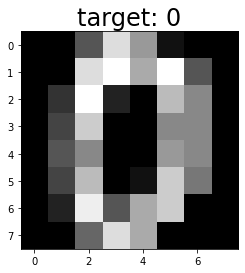

In [ ]:
#Mostrando la imagen del valor 0:
plt.figure(figsize=(9,4))     #tamaño de la imagen
plt.imshow(imagen,cmap='gray')
plt.title(f"target: {digits['target'][0]}", size=24)
plt.show()

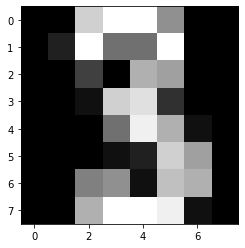

In [ ]:
index = np.random.randint(digits['data'].shape[0])
imagen2 = digits['data'][index,:].reshape(8,8)

#Mostrando la imagen 2:
plt.imshow(imagen2,cmap='gray')
plt.show()


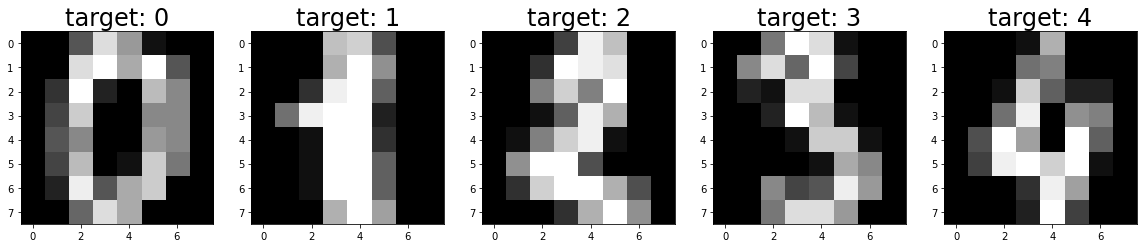

In [ ]:
#Para mostrar números con sus respectivas imágenes
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits['data'][:5], digits['target'][:5])):   #los 5 primeros valores de data y de target
  plt.subplot(1,5, index+1)       #es necesario poner el +1, sino sale error
  plt.imshow(image.reshape(8,8), cmap='gray')
  plt.title(f"target: {label}", size=24)

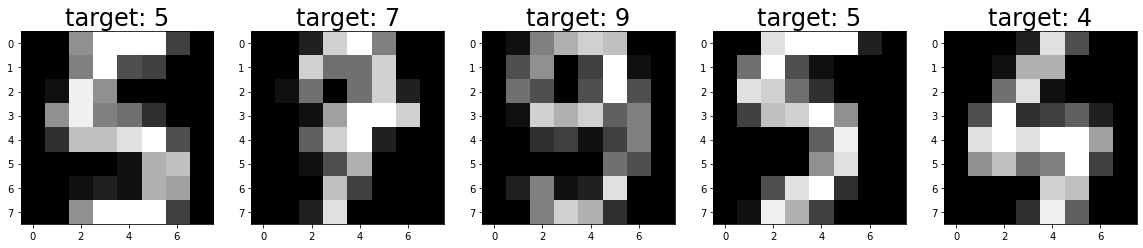

In [ ]:
#Si quiero mostrar 5 números aleatorios con sus respectivas imágenes:
idx = np.random.randint(digits['data'].shape[0]-5)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits['data'][idx:idx+5], digits['target'][idx:idx+5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image.reshape(8,8), cmap='gray')
  plt.title(f"target: {label}", size=24)

# Entrenando a mi modelo

In [ ]:
#Librería para usar el model selection
from sklearn.model_selection import train_test_split

In [ ]:
#Data de entrenamiento: X=digits['data']
#Data de test: y=digits['target']
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.25, random_state=42)   #25% de la data usada para el test

In [ ]:
#De los más de 1700 datos, solo se utilizan 1347 lineas (imágenes de números)para entrenar y 450 para hacer el testeo
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [ ]:
#Librería para hacer uso de la Regresión Logística:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creando mi modelo de Regresión Logística:
model = LogisticRegression(solver='lbfgs', max_iter=10000)   #el solver=lbfgs es el de defecto y max_iter es la cantidad máxima de iteraciones(más precisión)

In [ ]:
#Le pongo los parámetros de mis valores al modelo y lo entreno a mi modelo
model.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_train[0], y_train[0]

(array([ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
         3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
         0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
        15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.]), 5)

Resultado final esperado del Softmax (se usa One hot encoder) -> [0,1,2,3,4,5,6,7,8,9] 0 -> [1,0,0,0,0,0,0,0,0,0] 1 -> [0,1,0,0,0,0,0,0,0,0] 2 -> [0,0,1,0,0,0,0,0,0,0] 9 -> [0,0,0,0,0,0,0,0,0,1]

In [ ]:
#Cantidad de valores que funcionarán de entrada
model.coef_.shape  
#10: los números de imagen van de 0 al 9 (cada fila es un número)
#64: con 64 valores que el Softmax tiene como entrada dada la matriz 8x8

(10, 64)

In [ ]:
#número de iteraciones que se usó
model.n_iter_    #se usaron 1919 iteraciones para hallar el modelo

array([1919], dtype=int32)

In [ ]:
#Bias (el intercepto que se da con la recta)
model.intercept_    #son 10 parámtros de intercepción

array([ 3.1499914 , -5.58751865,  1.05479371, -0.51292687, 14.06898098,
       -9.21939618,  0.40937102,  4.03180585,  1.97742676, -9.37252802])

# Testeando mi modelo

In [ ]:
# Para poder ver el resultado de un único valor, necesito hacer un reshape (1,-1)
predic_prueba = model.predict(X_test[0].reshape(1,-1))   #fijar bien el orden 1(una imagen de número) de 64 valores

#Comparación:
print(predic_prueba)
print(y_test[0])

#Como se puede ver, el valor coincide, con lo que sabemos que nuestro modelo hizo bien esta

[6]
6


In [ ]:
# Comparando los 20 primeros valores del test:
print(model.predict(X_test[:20]))
print(y_test[:20])

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8]


In [ ]:
# Midiendo qué tan bueno es mi modelo
score = model.score(X_test, y_test)
score

0.9733333333333334

In [ ]:
# Para ver en qué valores se está confundiendo se utilizará la Mtriz de Confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns   #para hacer un mapa de calor (para usar con el confusion matrix)

In [ ]:
y_pred = model.predict(X_test)    #obtención de ls valores predictivos de mi modelo usando la data del X_test
matriz_confusion = confusion_matrix(y_test, y_pred)    #haciendo la comparación de los datos que mi modelo obtuvo vs los correctos del y_test

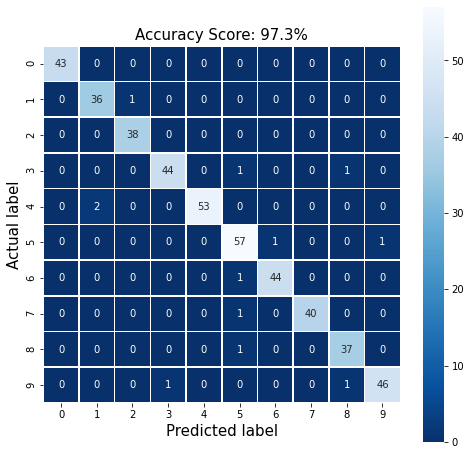

In [ ]:
#Haciendo un mapa de calor para verlo mejor:
plt.figure(figsize=(8,8))
sns.heatmap(matriz_confusion, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()

#Explicación: en el caso de 9, el modelo ha acertado 48 veces en su predicción, pero falló 2 veces pensando
# que era un 1 y en la tra pensando que era un 8

# Ejercicio de identificación de imágenes de números de 28x28

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [16]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
mnist['data'].shape

(70000, 784)

In [18]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [20]:
#Tamaños de mis train y test: con ello sabemos tamaño de matriz-> 28x28=784
print(train_img.shape)
print(test_img.shape)

print(train_lbl.shape)
print(test_lbl.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


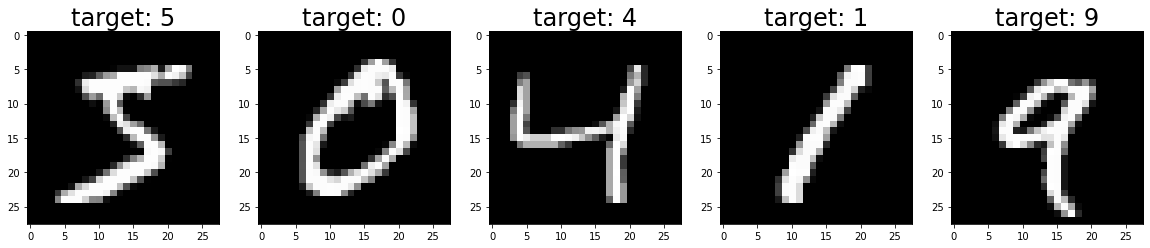

In [21]:
#imagen = train_img[0,:]
#imagen=imagen.reshape(28,28) 
#imagen 

#Para mostrar números con sus respectivas imágenes
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(mnist['data'][:5], mnist['target'][:5])):   #los 5 primeros valores de data y de target
  plt.subplot(1,5, index+1)       #es necesario poner el +1, sino sale error
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.title(f"target: {label}", size=24)

In [22]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)   #el solver=lbfgs es el de defecto y max_iter es la cantidad máxima de iteraciones(más precisión)

In [29]:
model.fit(train_img, train_lbl)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
model.n_iter_    #se usaron 1919 iteraciones para hallar el modelo

array([1000], dtype=int32)

In [31]:
#Cantidad de valores que funcionarán de entrada
model.coef_.shape  
#10: los números de imagen van de 0 al 9 (cada fila es un número)
#64: con 64 valores que el Softmax tiene como entrada dada la matriz 8x8

(10, 784)

In [32]:
# Comparando los 20 primeros valores del test:
print(model.predict(test_img[:20]))
print(test_lbl[:20])

['0' '4' '1' '2' '4' '9' '7' '1' '1' '3' '1' '3' '4' '2' '6' '4' '6' '7'
 '9' '3']
['0' '4' '1' '2' '7' '9' '7' '1' '1' '7' '1' '3' '4' '2' '6' '4' '6' '7'
 '3' '3']


In [33]:
# Midiendo qué tan bueno es mi modelo
score = model.score(test_img, test_lbl)
score

0.9110714285714285

In [ ]:
# Para ver en qué valores se está confundiendo se utilizará la Mtriz de Confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns   #para hacer un mapa de calor (para usar con el confusion matrix)

In [ ]:
pred_lbl = model.predict(test_img)    #obtención de ls valores predictivos de mi modelo usando la data del X_test
matriz_confusion = confusion_matrix(test_lbl, pred_lbl)    #haciendo la comparación de los datos que mi modelo obtuvo vs los correctos del y_test

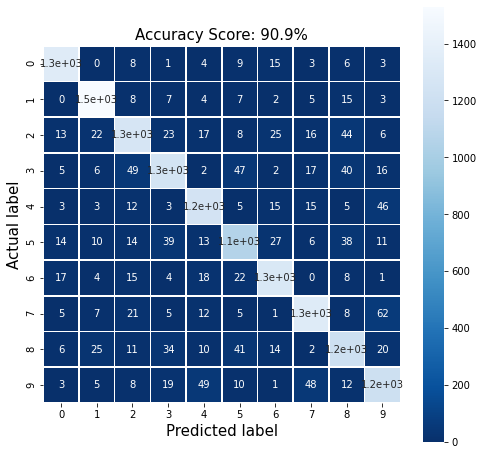

In [ ]:
#Haciendo un mapa de calor para verlo mejor:
plt.figure(figsize=(8,8))
sns.heatmap(matriz_confusion, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()

#Explicación: en el caso de 9, el modelo ha acertado 48 veces en su predicción, pero falló 2 veces pensando
# que era un 1 y en la tra pensando que era un 8